In [9]:
#set up our imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#import both our data sets

df = pd.read_csv(r'C:/Users/Quinn/Documents/Datasets/olympics/athlete_events.csv')
population_df = pd.read_csv(r'C:/Users/Quinn/Documents/Datasets/olympics/countries_of_the_world.csv')
schema_df = pd.read_csv(r'C:/Users/Quinn/Documents/Datasets/olympics/athlete_events_data_dictionary.csv',index_col="Field")

In [68]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [67]:
population_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [11]:
unique_list_of_countries = df["NOC"].unique()
medal_count_list = []

for country in unique_list_of_countries:
    gold = silver = bronze = 0
    medal_count = df[df["NOC"] == country]
    
    try:
        gold = medal_count["Medal"].value_counts()["Gold"]
    except KeyError:
        gold = 0
    try:
        silver = medal_count["Medal"].value_counts()["Silver"]
    except KeyError:
        silver = 0
    try:
        bronze = medal_count["Medal"].value_counts()["Bronze"]
    except KeyError:
        bronze = 0
        
    medal_dict = {}
    medal_dict = {
        "NOC": country,
        "Gold": gold,
        "Silver": silver,
        "Bronze": bronze, 
        "Total" : gold + silver + bronze,
        "Medal_Score" : (gold*3) + (silver*2) + bronze
    }
    
    medal_count_list.append(medal_dict)

medal_count_df = pd.DataFrame(medal_count_list)
medal_count_df.index = list(medal_count_df["NOC"])
print(medal_count_df.sort_values("Total", ascending=False).head(10))

     NOC  Gold  Silver  Bronze  Total  Medal_Score
USA  USA  2638    1641    1358   5637        12554
URS  URS  1082     732     689   2503         5399
GER  GER   745     674     746   2165         4329
GBR  GBR   678     739     651   2068         4163
FRA  FRA   501     610     666   1777         3389
ITA  ITA   575     531     531   1637         3318
SWE  SWE   479     522     535   1536         3016
CAN  CAN   463     438     451   1352         2716
AUS  AUS   348     455     517   1320         2471
RUS  RUS   390     367     408   1165         2312


In [12]:
unique_list_of_countries = df["NOC"].unique()
medal_count_list_2016 = []

for country in unique_list_of_countries:
    gold = silver = bronze = 0
    year_2016 = df[df["Year"] == 2016]
    medal_count = year_2016[year_2016["NOC"] == country]
    
    try:
        gold = medal_count["Medal"].value_counts()["Gold"]
    except KeyError:
        gold = 0
    try:
        silver = medal_count["Medal"].value_counts()["Silver"]
    except KeyError:
        silver = 0
    try:
        bronze = medal_count["Medal"].value_counts()["Bronze"]
    except KeyError:
        bronze = 0
        
    medal_dict = {}
    medal_dict = {
        "NOC": country,
        "Gold": gold,
        "Silver": silver,
        "Bronze": bronze, 
        "Total" : gold + silver + bronze,
        "Medal_Score" : (gold*3) + (silver*2) + bronze
    }
    
    medal_count_list_2016.append(medal_dict)

medal_count_2016_df = pd.DataFrame(medal_count_list_2016)
medal_count_2016_df.index = list(medal_count_2016_df["NOC"])
print(medal_count_2016_df.sort_values("Total", ascending=False).head(10))

     NOC  Gold  Silver  Bronze  Total  Medal_Score
USA  USA   139      54      71    264          596
GER  GER    49      43      67    159          300
GBR  GBR    64      55      26    145          328
RUS  RUS    52      28      35    115          247
CHN  CHN    46      30      37    113          235
FRA  FRA    20      55      21     96          191
AUS  AUS    23      34      25     82          162
ITA  ITA     8      40      24     72          128
CAN  CAN     4       4      61     69           81
JPN  JPN    17      13      34     64          111


In [15]:
#We need to add the country name to our table so that we can perform a joins with our population table. Our df table does not have
#consistent country names so we use the country name from our population table. Therefore we need to add country name to our medal
#count table

population_df["Country"] = population_df["Country"].str.rstrip()
list_of_countries = population_df["Country"].unique()

for country in list_of_countries:
    
    #first we check to see if our medal df has any records for the country from our population df
    if len(df[df["Team"] == country]) > 0:
        
        #if it does we will create the country column and add the country name to the row where it matches the NOC
        
        a = (df[df["Team"] == country].iloc[0]["NOC"])
        medal_count_df.loc[a, "Country"] = country
        medal_count_2016_df.loc[a, "Country"] = country
    else:
        print("no record of " + country)

no record of Anguilla
no record of Antigua & Barbuda
no record of Bahamas, The
no record of Bosnia & Herzegovina
no record of British Virgin Is.
no record of Burma
no record of Central African Rep.
no record of Congo, Dem. Rep.
no record of Congo, Repub. of the
no record of East Timor
no record of Faroe Islands
no record of French Guiana
no record of French Polynesia
no record of Gambia, The
no record of Gaza Strip
no record of Gibraltar
no record of Greenland
no record of Guadeloupe
no record of Guernsey
no record of Guinea-Bissau
no record of Isle of Man
no record of Jersey
no record of Macau
no record of Martinique
no record of Mayotte
no record of Micronesia, Fed. St.
no record of Montserrat
no record of New Caledonia
no record of N. Mariana Islands
no record of Reunion
no record of Saint Helena
no record of Saint Kitts & Nevis
no record of St Pierre & Miquelon
no record of Sao Tome & Principe
no record of Taiwan
no record of Trinidad & Tobago
no record of Turks & Caicos Is
no reco

In [29]:
#perform a joins on the two talbes


medal_count_df =  medal_count_df.merge(population_df, on='Country')
medal_count_2016_df =  medal_count_2016_df.merge(population_df, on='Country')
#medal_count_2016_df['GDP'] = medal_count_2016_df['GDP ($ per capita)'] * medal_count_2016_df['Population']

In [32]:
#add GDP column to the medal count 2016 table

medal_count_2016_df['GDP'] = medal_count_2016_df['GDP ($ per capita)'] * medal_count_2016_df['Population']

In [33]:
#create one more table where the data is grouped by regions

region_group_2016 = medal_count_2016_df.groupby(['Region']).sum()

In [34]:
#We want to calculate a new field to show the medal score per population

region_group_2016 = region_group_2016.sort_values("Medal_Score", ascending = False)
region_group_2016["Medal_Score_Per_Capita"] = region_group_2016["Medal_Score"]/region_group_2016["Population"]
region_group_2016.sort_values("Medal_Score_Per_Capita", ascending=False)[["Medal_Score_Per_Capita","Population","GDP ($ per capita)"]]

,Medal_Score_Per_Capita,Population,GDP ($ per capita)
Region,,,
OCEANIA,8.448615e-06,32431350,122500.0
WESTERN EUROPE,3.449208e-06,396032890,652000.0
EASTERN EUROPE,2.737928e-06,115415741,111600.0
NORTHERN AMERICA,2.041561e-06,331608920,103600.0
BALTICS,1.809332e-06,7184974,33900.0
C.W. OF IND. STATES,1.410304e-06,280081548,48000.0
LATIN AMER. & CARIB,5.741549e-07,559082563,259200.0
SUB-SAHARAN AFRICA,1.527063e-07,674497453,101400.0
NEAR EAST,1.359981e-07,191179128,165900.0


In [61]:
#Analysis begins below.
#Above is building out our tables to make plots with.
#
#
#
#
#
#
#

In [66]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


[Text(0.5, 1.0, 'Countries with the Highest Medal Score')]

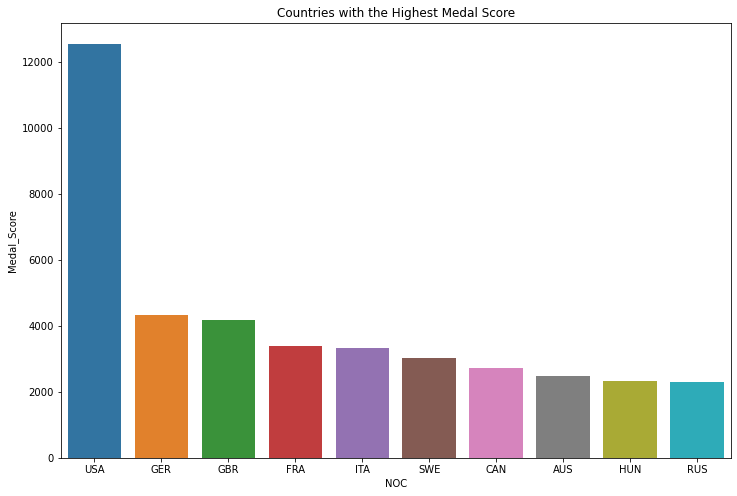

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="NOC", y="Medal_Score", ax=ax, data=medal_count_df.sort_values("Medal_Score", ascending = False).head(10)).set(title="Countries with the Highest Medal Score")

In [70]:
df['Year'].min()

1896

[Text(0.5, 1.0, 'Counties with the Highest Medal Score in 2016')]

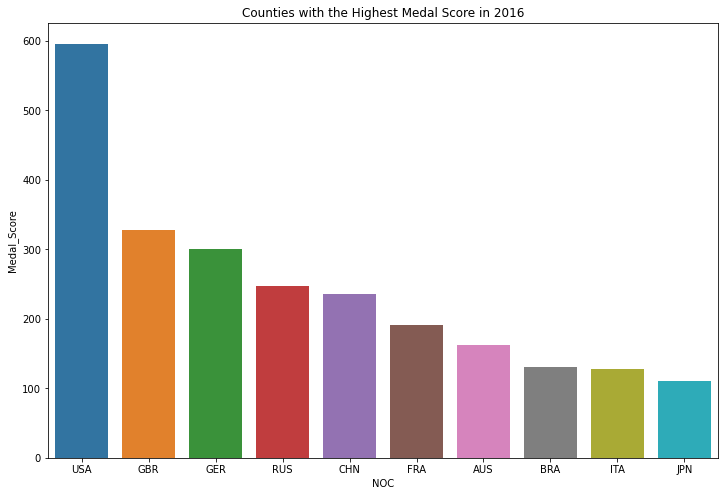

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="NOC", y="Medal_Score", ax=ax, data=medal_count_2016_df.sort_values("Medal_Score", ascending = False).head(10)).set(title="Counties with the Highest Medal Score in 2016")

<AxesSubplot:xlabel='Population', ylabel='Medal_Score'>

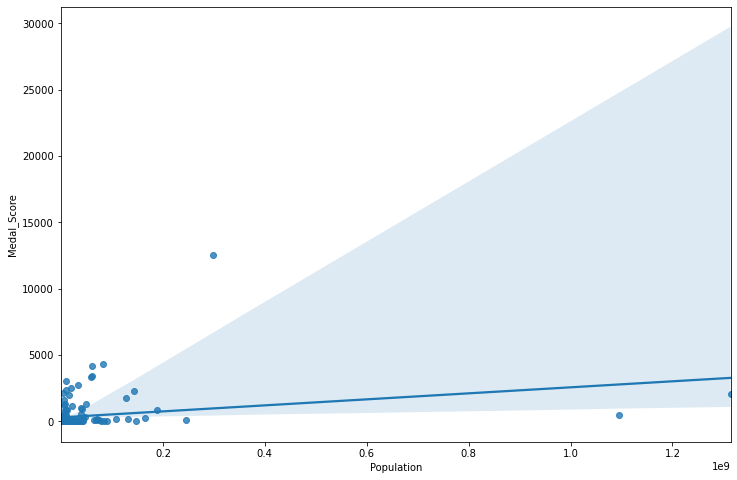

In [45]:
#scatter plot of population vs medal score
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(data= medal_count_df, x='Population', y='Medal_Score', ax=ax)

In [38]:
#table of above chart

medal_count_df.sort_values("Medal_Score", ascending=False)[["Country","Population","Medal_Score"]].head(10)

,Country,Population,Medal_Score
3,United States,298444215,12554
38,Germany,82422299,4329
78,Great Britain,60609153,4163
8,France,60876136,3389
14,Italy,58133509,3318
71,Sweden,9016596,3016
39,Canada,33098932,2716
41,Australia,20264082,2471
28,Hungary,9981334,2331
18,Russia,142893540,2312


In [40]:
#table of above chart sorted by population

medal_count_df.sort_values("Population", ascending=False)[["Country","Population","Medal_Score"]].head(10)

,Country,Population,Medal_Score
0,China,1313973713,2036
53,India,1095351995,492
3,United States,298444215,12554
59,Indonesia,245452739,80
67,Brazil,188078227,868
33,Pakistan,165803560,250
98,Bangladesh,147365352,0
18,Russia,142893540,2312
29,Nigeria,131859731,175
65,Japan,127463611,1716


<AxesSubplot:xlabel='Population', ylabel='Medal_Score'>

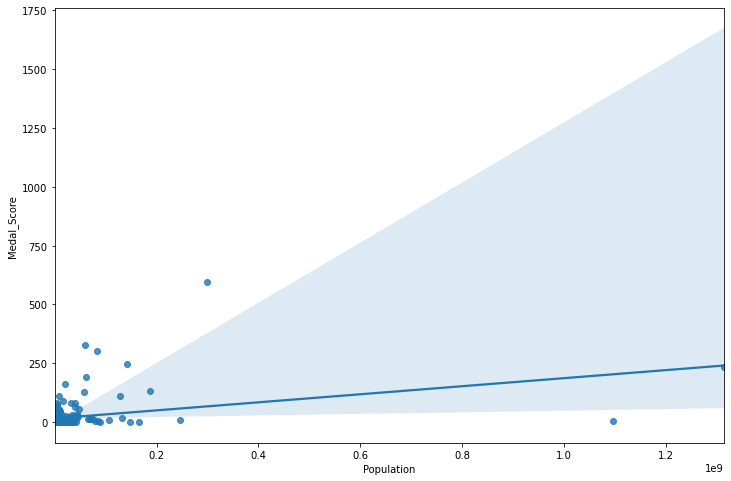

In [71]:
#scatter plot of population vs medal score from just 2016
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(data= medal_count_2016_df, x='Population', y='Medal_Score', ax=ax)

In [47]:
#Look at country population distribution

medal_count_df["Population"].describe()

count    1.860000e+02
mean     3.421880e+07
std      1.295307e+08
min      1.181000e+04
25%      1.732462e+06
50%      7.323656e+06
75%      2.209171e+07
max      1.313974e+09
Name: Population, dtype: float64

In [48]:
medal_count_2016_df[medal_count_2016_df["Medal_Score"] == 1].sort_values("Population")

,NOC,Gold,Silver,Bronze,Total,Medal_Score,Country,Region_x,Population_x,Area (sq. mi.)_x,...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
58,UAE,0,0,1,1,1,United Arab Emirates,NEAR EAST,2602713,82880,...,"0,6","2,25","97,15",1,"18,96","4,4","0,04","0,585","0,375",6.038294e+10
4,FIN,0,0,1,1,1,Finland,WESTERN EUROPE,5231372,338145,...,"7,19","0,03","92,78",3,"10,45","9,86","0,028","0,295","0,676",1.433396e+11
111,DOM,0,0,1,1,1,Dominican Republic,LATIN AMER. & CARIB,9183984,48730,...,"22,65","10,33","67,02",2,"23,22","5,73","0,112","0,306","0,582",5.510390e+10
93,POR,0,0,1,1,1,Portugal,WESTERN EUROPE,10605870,92391,...,"21,75","7,81","70,44",3,"10,72","10,5","0,053","0,274","0,673",1.909057e+11
9,MAR,0,0,1,1,1,Morocco,NORTHERN AFRICA,33241259,446550,...,"19,61","2,17","78,22",NaN,"21,98","5,58","0,217","0,357","0,426",1.329650e+11


<AxesSubplot:xlabel='Population', ylabel='Medal_Score'>

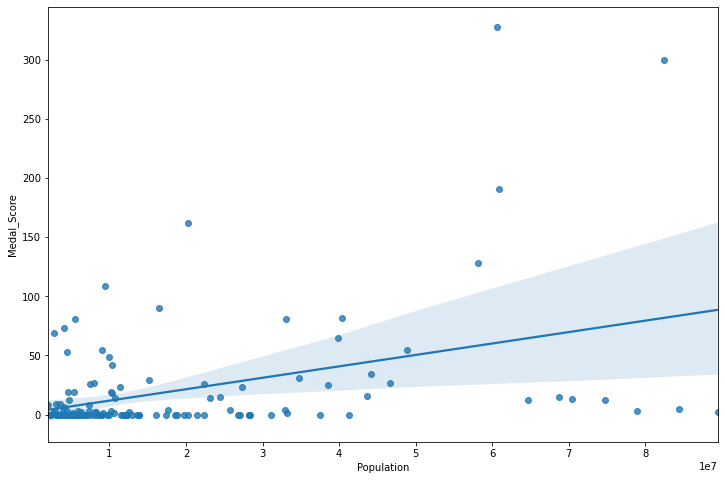

In [51]:
#limiting the population to 100,000,000 - 200,000,000
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(data= medal_count_2016_df[(medal_count_2016_df['Population'] >2000000) & (medal_count_2016_df['Population'] < 100000000)], x='Population', y='Medal_Score',ax=ax)

<AxesSubplot:xlabel='GDP', ylabel='Medal_Score'>

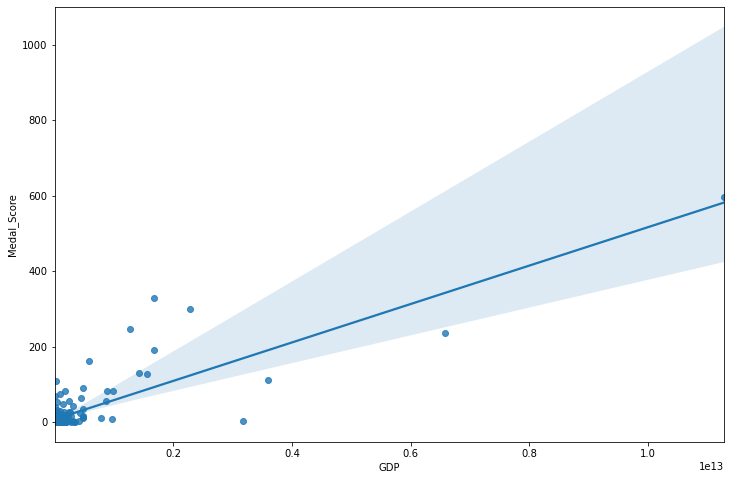

In [55]:
#plot GDP vs medal score
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(data= medal_count_2016_df, x='GDP', y='Medal_Score', ax=ax)

In [56]:
#table of above plot

medal_count_2016_df.sort_values("GDP", ascending=False)[["Country","GDP","Medal_Score"]].head(10)

,Country,GDP,Medal_Score
3,United States,1.128119e+13,596
0,China,6.569869e+12,235
65,Japan,3.594474e+12,111
53,India,3.176521e+12,3
38,Germany,2.274855e+12,300
8,France,1.680181e+12,191
78,Great Britain,1.678874e+12,328
14,Italy,1.552165e+12,128
67,Brazil,1.429395e+12,130
18,Russia,1.271753e+12,247


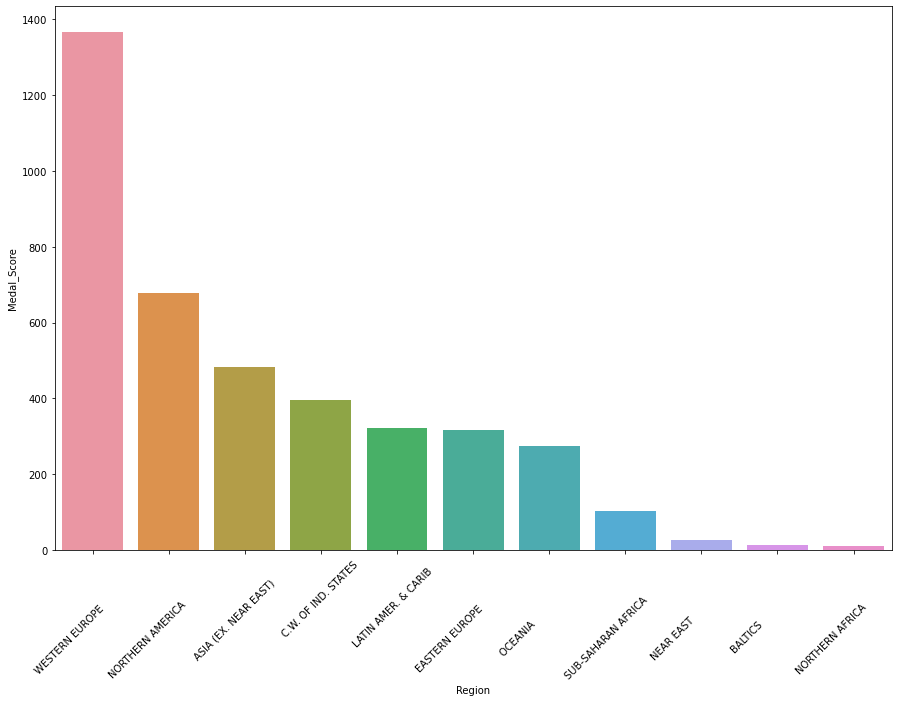

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=region_group_2016.index, y="Medal_Score",data=region_group_2016.sort_values("Medal_Score", ascending = False), ax =ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [57]:
#Table of regions sorted by medal score per person.

region_group_2016.sort_values("Medal_Score_Per_Capita", ascending=False)[["Medal_Score_Per_Capita","Population","GDP ($ per capita)"]]

,Medal_Score_Per_Capita,Population,GDP ($ per capita)
Region,,,
OCEANIA,8.448615e-06,32431350,122500.0
WESTERN EUROPE,3.449208e-06,396032890,652000.0
EASTERN EUROPE,2.737928e-06,115415741,111600.0
NORTHERN AMERICA,2.041561e-06,331608920,103600.0
BALTICS,1.809332e-06,7184974,33900.0
C.W. OF IND. STATES,1.410304e-06,280081548,48000.0
LATIN AMER. & CARIB,5.741549e-07,559082563,259200.0
SUB-SAHARAN AFRICA,1.527063e-07,674497453,101400.0
NEAR EAST,1.359981e-07,191179128,165900.0
